### PROBLEM DEFINITION

## Bussiness case : 
   #### Create a predictive model will help the teacher to identify the performance of the students.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sweetviz as sv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,recall_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('tae.csv')
data

,1,23,3,1.1,19,3.1
0,2,15,3,1,17,3
1,1,23,3,2,49,3
2,1,5,2,2,33,3
3,2,7,11,2,55,3
4,2,23,3,1,20,3
...,...,...,...,...,...,...
145,2,3,2,2,26,1
146,2,10,3,2,12,1
147,1,18,7,2,48,1
148,2,22,1,2,51,1


#### Domain Analysis

In [3]:
data.rename({'1':'Native_teacher', '23':'Instructor', '3':'Course', '1.1':'Semester', '19':'Class_size', '3.1':'performance'},axis=1, inplace=True)
data

,Native_teacher,Instructor,Course,Semester,Class_size,performance
0,2,15,3,1,17,3
1,1,23,3,2,49,3
2,1,5,2,2,33,3
3,2,7,11,2,55,3
4,2,23,3,1,20,3
...,...,...,...,...,...,...
145,2,3,2,2,26,1
146,2,10,3,2,12,1
147,1,18,7,2,48,1
148,2,22,1,2,51,1


#### Basic Checks

In [4]:
data.head()

,Native_teacher,Instructor,Course,Semester,Class_size,performance
0,2,15,3,1,17,3
1,1,23,3,2,49,3
2,1,5,2,2,33,3
3,2,7,11,2,55,3
4,2,23,3,1,20,3


In [5]:
data.tail()

,Native_teacher,Instructor,Course,Semester,Class_size,performance
145,2,3,2,2,26,1
146,2,10,3,2,12,1
147,1,18,7,2,48,1
148,2,22,1,2,51,1
149,2,2,10,2,27,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Native_teacher  150 non-null    int64
 1   Instructor      150 non-null    int64
 2   Course          150 non-null    int64
 3   Semester        150 non-null    int64
 4   Class_size      150 non-null    int64
 5   performance     150 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB


In [7]:
data.describe()

,Native_teacher,Instructor,Course,Semester,Class_size,performance
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,1.813333,13.580000,8.140000,1.853333,27.926667,2.013333
std,0.390949,6.805318,7.034937,0.354958,12.916405,0.819123
min,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
25%,2.000000,8.000000,3.000000,2.000000,19.000000,1.000000
50%,2.000000,13.000000,4.500000,2.000000,27.000000,2.000000
75%,2.000000,20.000000,15.000000,2.000000,37.000000,3.000000
max,2.000000,25.000000,26.000000,2.000000,66.000000,3.000000


In [8]:
data.shape

(150, 6)

In [9]:
data.columns

Index(['Native_teacher', 'Instructor', 'Course', 'Semester', 'Class_size',
       'performance'],
      dtype='object')

#### Exploratory Data Analysis

In [10]:
my_report = sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


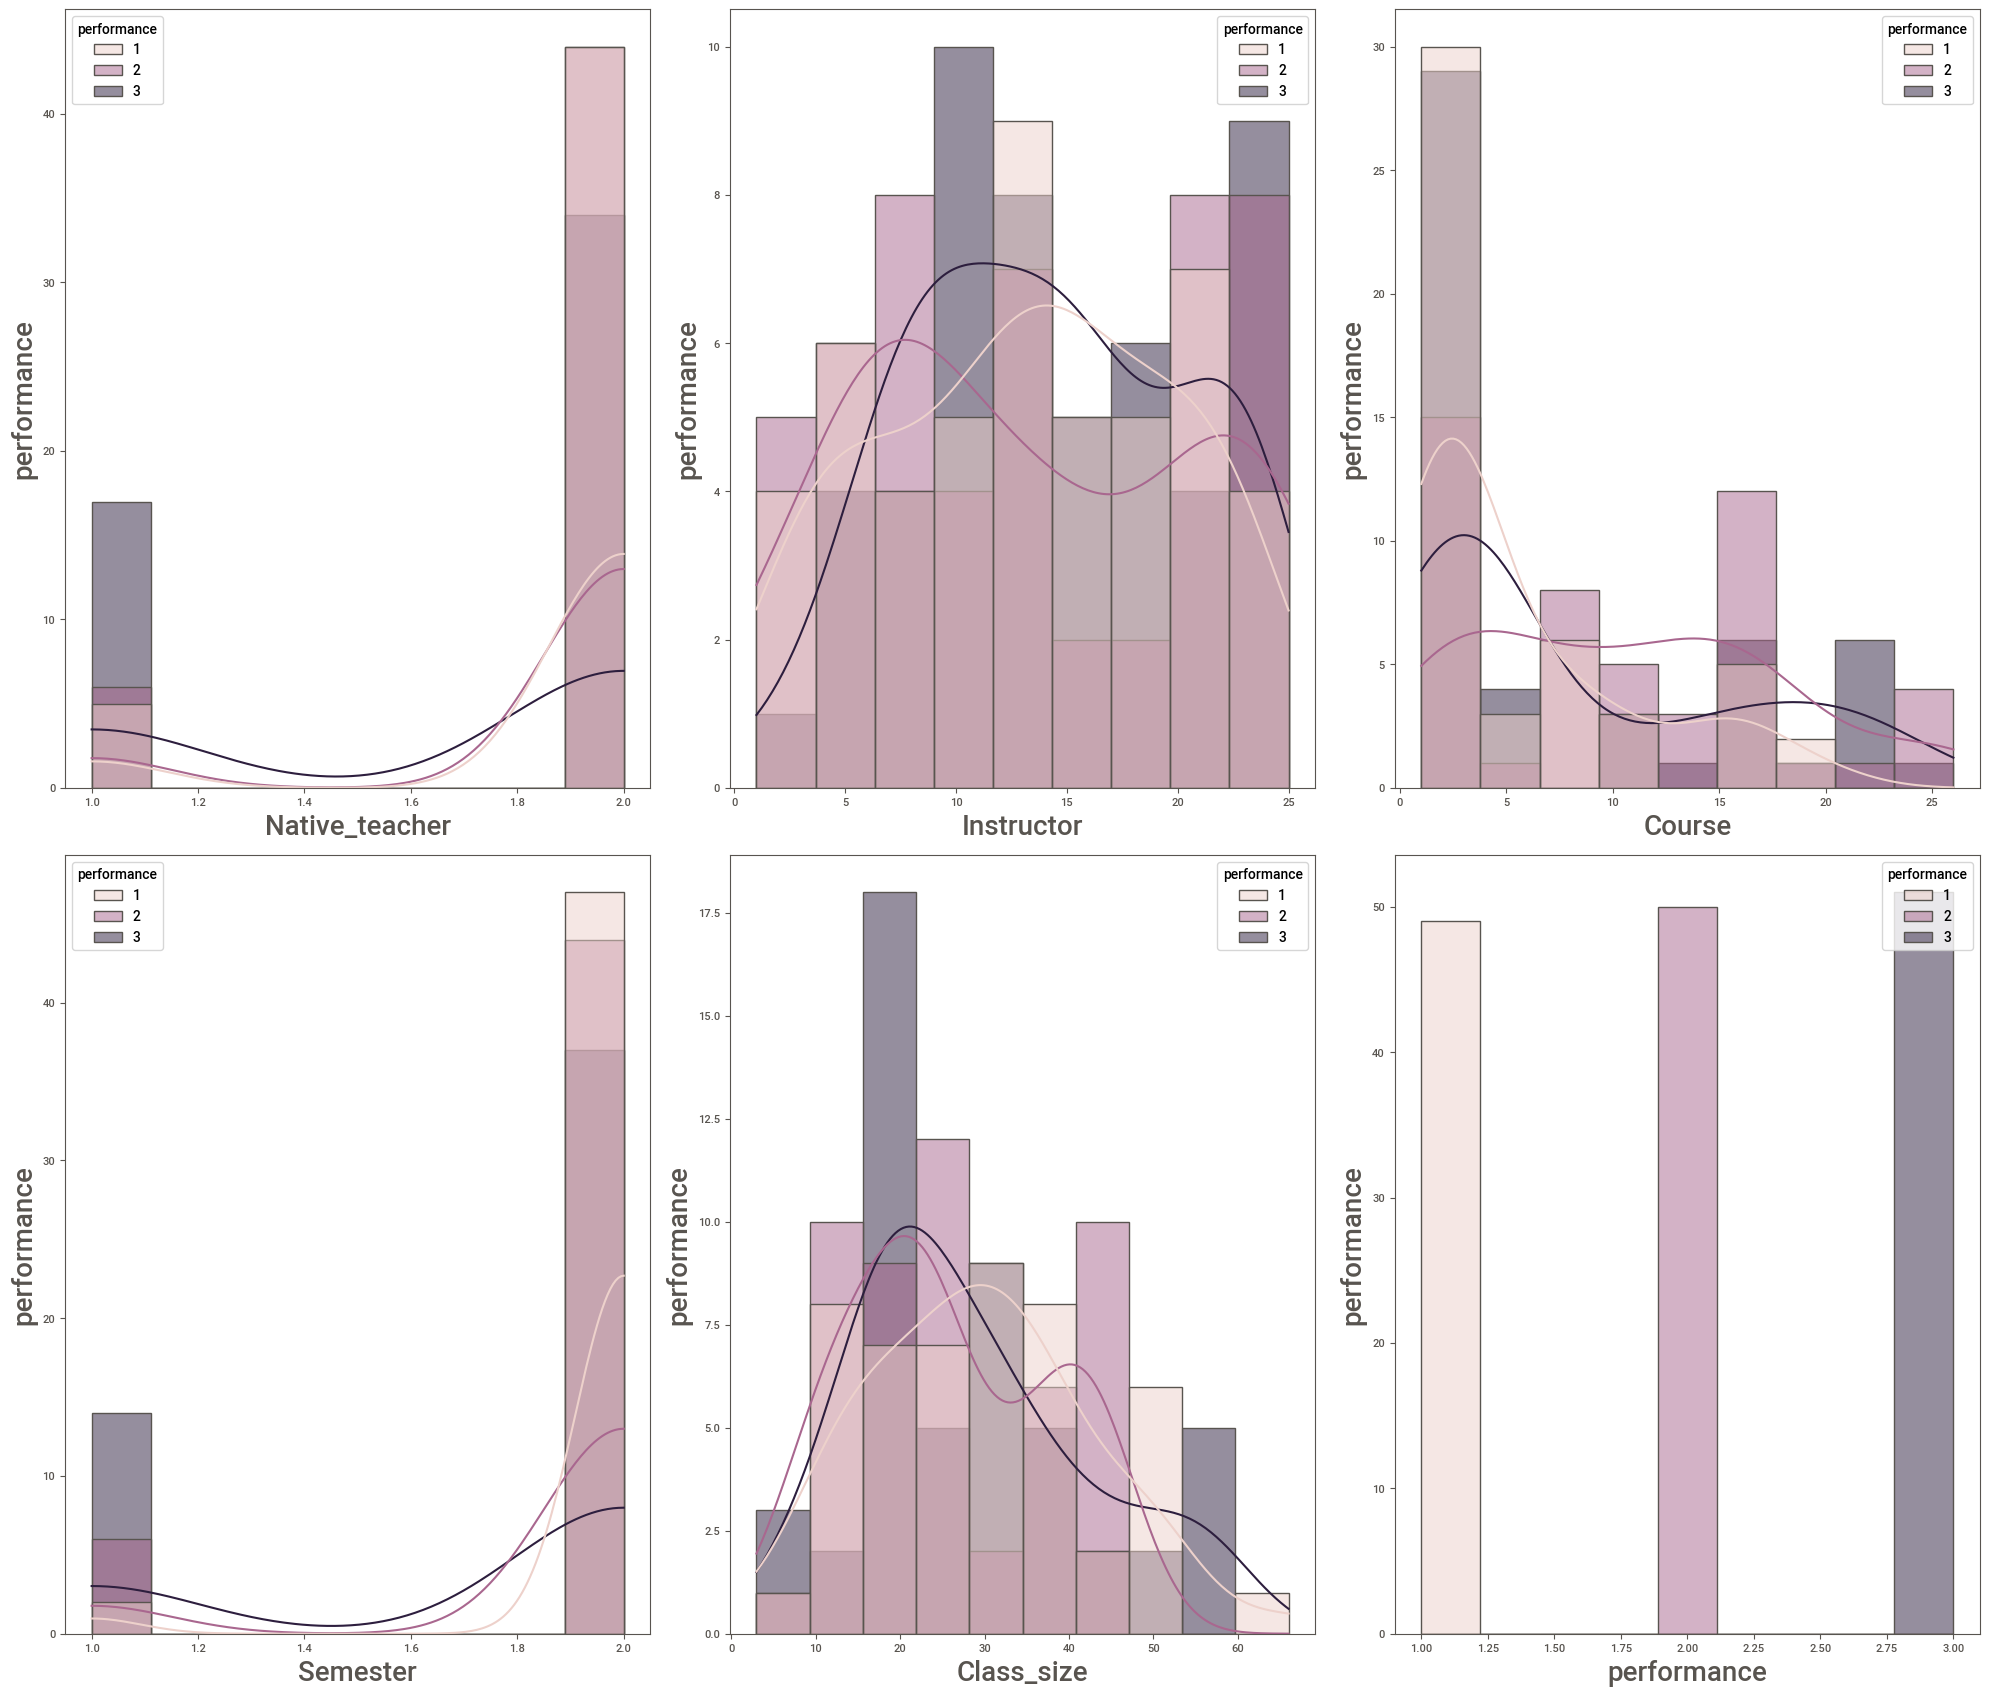

In [11]:
plt.figure(figsize=(20,25), facecolor='white') 
plotnumber = 1

for column in data: 
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.histplot(x=data[column],hue=data['performance'],kde=True)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('performance',fontsize=20)
    plotnumber+=1
plt.tight_layout()

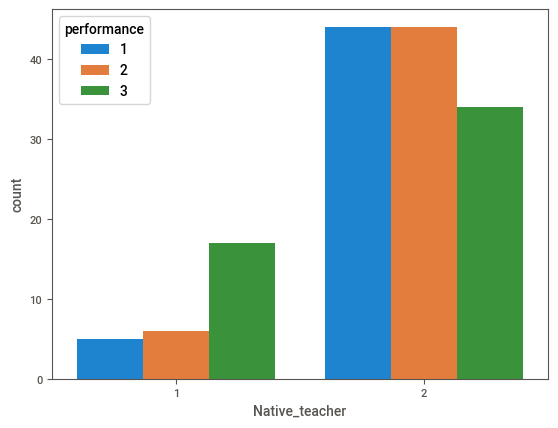

In [12]:
sns.countplot(x='Native_teacher',hue='performance',data=data)
plt.show()

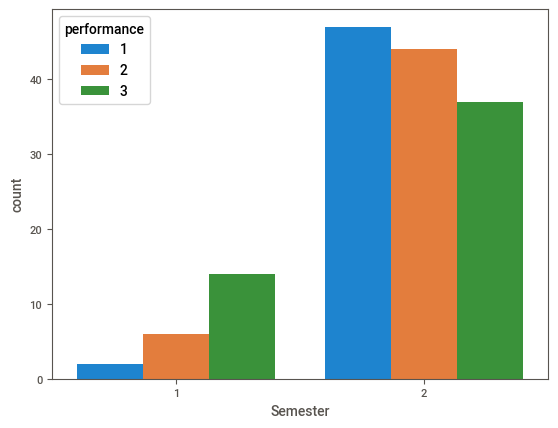

In [13]:

sns.countplot(x='Semester',hue='performance',data=data)
plt.show()

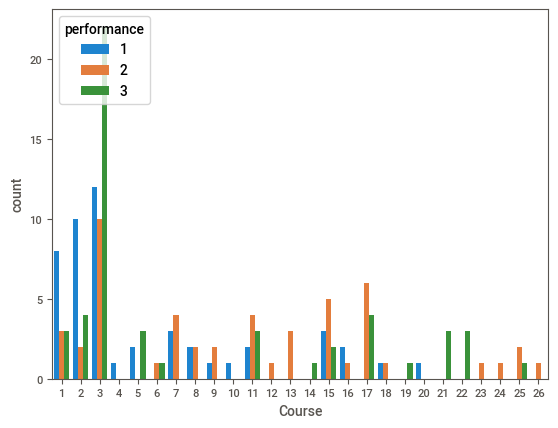

In [14]:
sns.countplot(x='Course',hue='performance',data=data)
plt.show()

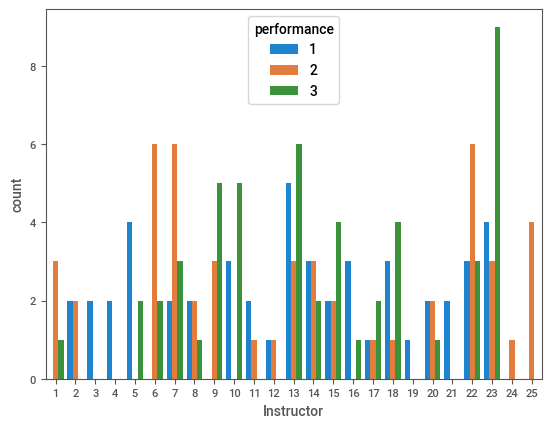

In [15]:
sns.countplot(x='Instructor',hue='performance',data=data)
plt.show()

#### Data Preprocessing

In [16]:
data.isnull().sum()

Native_teacher    0
Instructor        0
Course            0
Semester          0
Class_size        0
performance       0
dtype: int64

##### Outlier handling

In [17]:
from scipy import stats
IQR = stats.iqr(data.Class_size, interpolation = 'midpoint')
IQR

18.0

In [18]:
Q1=data.Class_size.quantile(0.25)
Q3=data.Class_size.quantile(0.75)
min_limit=Q1 - 1.5*IQR
max_limit=Q3 + 1.5*IQR

In [19]:
data.loc[data['Class_size']<min_limit]

,Native_teacher,Instructor,Course,Semester,Class_size,performance


In [20]:
data.loc[data['Class_size']>max_limit]

,Native_teacher,Instructor,Course,Semester,Class_size,performance
115,2,15,1,2,66,1


In [21]:
1/150 *100

0.6666666666666667

In [22]:
data.loc[data['Class_size']>max_limit,'Class_size']=np.median(data.Class_size)
data

,Native_teacher,Instructor,Course,Semester,Class_size,performance
0,2,15,3,1,17,3
1,1,23,3,2,49,3
2,1,5,2,2,33,3
3,2,7,11,2,55,3
4,2,23,3,1,20,3
...,...,...,...,...,...,...
145,2,3,2,2,26,1
146,2,10,3,2,12,1
147,1,18,7,2,48,1
148,2,22,1,2,51,1


#### Feature Selection

<AxesSubplot:>

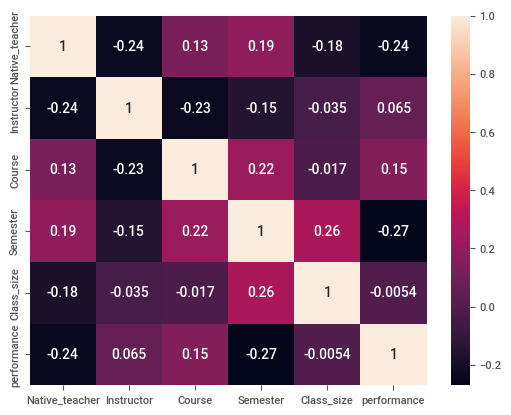

In [23]:
sns.heatmap(data.corr(),annot=True)

#### Model Creation

In [24]:
X = data.drop(columns = ['performance']) # Independent variables
y = data['performance']

In [25]:
features = [col for col in data.columns if col not in ['performance']]
df_train, df_test = train_test_split(data, random_state=42)

X_train = df_train[features]
y_train = df_train['performance']

X_test = df_test[features]
y_test = df_test['performance']

model_scores = []

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [27]:
# global variable to keep track the scores of models
model_scores = []

def select_best_model(model_name, model, model_params):
    """
    Select the best scaler and parameters for the given model
    """
    scalers = [
        ('No scaler', None),
        ('StandardScaler', StandardScaler()),
        ('Normalizer', Normalizer()),
        ('MinMaxScaler', MinMaxScaler()),
        ('RobustScaler', RobustScaler())
    ]
    scaler_and_scores = []
    for scaler_name, scaler in scalers:
        steps = [('scaler', scaler), ('model', model)] if scaler else [('model', model)]
        pipe = Pipeline(steps)
        grid = GridSearchCV(pipe, model_params)
        grid.fit(X_train, y_train)
        score = grid.score(X_test, y_test)
        scaler_and_scores.append((scaler_name, score, grid.best_params_, grid))
        
    scaler_and_scores.sort(key=lambda item: -item[1])
    best_score = scaler_and_scores[0][1]
    model_scores.append((model_name, best_score))
    
    score_df = pd.DataFrame(scaler_and_scores, columns=['scaler', 'accuracy', 'best_params', 'model'])
    return score_df

#### Model: Logistic Regression

In [28]:
model = LogisticRegression()
params = {
    'model__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'model__C': [0.1, 1, 10, 100]
}

score_df = select_best_model('Logistic Regression', model, params)
score_df[score_df.columns[:-1]]

,scaler,accuracy,best_params
0,No scaler,0.605263,"{'model__C': 0.1, 'model__penalty': 'none'}"
1,StandardScaler,0.578947,"{'model__C': 0.1, 'model__penalty': 'none'}"
2,MinMaxScaler,0.578947,"{'model__C': 0.1, 'model__penalty': 'none'}"
3,RobustScaler,0.578947,"{'model__C': 0.1, 'model__penalty': 'none'}"
4,Normalizer,0.342105,"{'model__C': 1, 'model__penalty': 'l2'}"


### Model: Neural Network

In [29]:
model = MLPClassifier()
params = {
    'model__hidden_layer_sizes': [(100), (100, 100), (100, 100, 100)],
    'model__activation': ['relu', 'identity', 'tanh', 'logistic'],
#     'model__solver': ['lbfgs', 'sgd', 'adam']
}
score_df = select_best_model('Neural Network', model, params)
score_df[score_df.columns[:-1]]

,scaler,accuracy,best_params
0,StandardScaler,0.578947,"{'model__activation': 'relu', 'model__hidden_l..."
1,MinMaxScaler,0.578947,"{'model__activation': 'identity', 'model__hidd..."
2,RobustScaler,0.578947,"{'model__activation': 'identity', 'model__hidd..."
3,Normalizer,0.500000,"{'model__activation': 'tanh', 'model__hidden_l..."
4,No scaler,0.447368,"{'model__activation': 'tanh', 'model__hidden_l..."


### Model: Random Forest

In [30]:
model = RandomForestClassifier()
params = {
    'model__n_estimators': [10, 50, 100, 200],
    'model__criterion': ['gini', 'entropy']
}

score_df = select_best_model('Random Forest', model, params)
score_df[score_df.columns[:-1]]

,scaler,accuracy,best_params
0,No scaler,0.710526,"{'model__criterion': 'gini', 'model__n_estimat..."
1,MinMaxScaler,0.710526,"{'model__criterion': 'entropy', 'model__n_esti..."
2,RobustScaler,0.710526,"{'model__criterion': 'gini', 'model__n_estimat..."
3,Normalizer,0.578947,"{'model__criterion': 'entropy', 'model__n_esti..."
4,StandardScaler,0.552632,"{'model__criterion': 'gini', 'model__n_estimat..."


### Model: Decision Tree

In [31]:
model = DecisionTreeClassifier()
params = {
    'model__criterion': ['gini', 'entropy'],
    'model__splitter': ['best', 'random']
}

score_df = select_best_model('Decision Tree', model, params)
score_df[score_df.columns[:-1]]

,scaler,accuracy,best_params
0,MinMaxScaler,0.736842,"{'model__criterion': 'gini', 'model__splitter'..."
1,No scaler,0.631579,"{'model__criterion': 'gini', 'model__splitter'..."
2,RobustScaler,0.605263,"{'model__criterion': 'entropy', 'model__splitt..."
3,StandardScaler,0.578947,"{'model__criterion': 'gini', 'model__splitter'..."
4,Normalizer,0.578947,"{'model__criterion': 'gini', 'model__splitter'..."


### Model: Gradient Boosting

In [32]:
model = GradientBoostingClassifier()
params = {
    'model__loss': ['deviance', 'exponential'],
    'model__n_estimators': [10, 100, 200, 500]
}

score_df = select_best_model('Gradient Boosting', model, params)
score_df[score_df.columns[:-1]]

,scaler,accuracy,best_params
0,RobustScaler,0.657895,"{'model__loss': 'deviance', 'model__n_estimato..."
1,No scaler,0.631579,"{'model__loss': 'deviance', 'model__n_estimato..."
2,StandardScaler,0.631579,"{'model__loss': 'deviance', 'model__n_estimato..."
3,MinMaxScaler,0.631579,"{'model__loss': 'deviance', 'model__n_estimato..."
4,Normalizer,0.500000,"{'model__loss': 'deviance', 'model__n_estimato..."


### Model: SVM

In [41]:
model = SVC()
params = {
    'model__C': [0.1, 1, 10, 100],
    'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'model__degree': [1, 3, 5, 10, 20]
}

score_df = select_best_model('SVM', model, params)
score_df[score_df.columns[:-1]]

,scaler,accuracy,best_params
0,MinMaxScaler,0.684211,"{'model__C': 0.1, 'model__degree': 20, 'model_..."
1,StandardScaler,0.605263,"{'model__C': 1, 'model__degree': 1, 'model__ke..."
2,Normalizer,0.552632,"{'model__C': 100, 'model__degree': 10, 'model_..."
3,No scaler,0.473684,"{'model__C': 10, 'model__degree': 1, 'model__k..."
4,RobustScaler,0.473684,"{'model__C': 100, 'model__degree': 1, 'model__..."


## Conclusion

In [42]:
model_scores.sort(key=lambda item: -item[1])
model_df = pd.DataFrame(model_scores, columns=['model', 'accuracy'])
model_df

,model,accuracy
0,Decision Tree,0.736842
1,Random Forest,0.710526
2,SVM,0.684211
3,Gradient Boosting,0.657895
4,Logistic Regression,0.605263
5,Neural Network,0.578947


In [45]:
model_scores

[('Decision Tree', 0.7368421052631579),
 ('Random Forest', 0.7105263157894737),
 ('SVM', 0.6842105263157895),
 ('Gradient Boosting', 0.6578947368421053),
 ('Logistic Regression', 0.6052631578947368),
 ('Neural Network', 0.5789473684210527)]

In [46]:
model_df.to_csv('submission_PRCP-1026-Teaching Assistance.csv')